In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
import numpy as np

from sklearn.ensemble import RandomForestClassifier

In [12]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH_TWO_M_S")
dataset = pd.read_csv(dataset_path)
dataset.head()

,Label,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
0,10,1,-0.245796,2,-1.019371,-0.095235,2.614216,-1.166397,1.203260,0.087842,...,-1.217359,0.735259,-1.159026,-1.117524,-0.393084,-1.031151,-0.930884,-0.502486,-0.824079,-1.114928
1,96,0,0.635522,0,1.083965,0.799432,NaN,-1.402115,1.221476,-0.539816,...,0.564794,-0.476694,0.837031,1.846943,0.565490,1.693742,1.625749,1.216268,0.627802,1.082838
2,30184,0,0.492049,0,0.649586,1.057777,-0.622258,0.644524,0.190466,-0.145675,...,-0.641940,1.081057,1.055954,-0.759657,1.315485,-0.051163,-0.894391,0.821116,-0.252989,-0.386529
3,30027,1,0.058930,2,-1.107973,1.069914,-0.175474,-0.905934,-1.735228,-1.359674,...,0.721399,-0.909562,-0.503633,-0.516780,-0.846971,-0.710507,-0.229208,-3.242868,-1.859810,-0.680988
4,30175,0,0.466002,0,0.356660,-1.293161,2.887394,-3.837310,0.914971,6.977535,...,0.158647,-0.154363,-0.079094,0.345134,-0.156995,0.822559,0.215835,1.414830,0.281190,1.012641


In [13]:
dataset

,Label,Gender,Age,DIAGNOSIS,MMSE,Hip ASM,Hip Contrast,Hip Correlation,Hip Variance,Hip Sum Average,...,ERC CONTRAST,ERC CORRELATION,ERC VARIANCE,ERC SUM AVERAGE,ERC SUM VARIANCE,ERC ENTROPY,ERC CLUSTER SHADE,ERCs_thicknessbaseline,ERCsVolumebaseline,TOTAL_HIPPOCAMPUS_VOLUME
0,10,1,-0.245796,2,-1.019371,-0.095235,2.614216,-1.166397,1.203260,0.087842,...,-1.217359,0.735259,-1.159026,-1.117524,-0.393084,-1.031151,-0.930884,-0.502486,-0.824079,-1.114928
1,96,0,0.635522,0,1.083965,0.799432,NaN,-1.402115,1.221476,-0.539816,...,0.564794,-0.476694,0.837031,1.846943,0.565490,1.693742,1.625749,1.216268,0.627802,1.082838
2,30184,0,0.492049,0,0.649586,1.057777,-0.622258,0.644524,0.190466,-0.145675,...,-0.641940,1.081057,1.055954,-0.759657,1.315485,-0.051163,-0.894391,0.821116,-0.252989,-0.386529
3,30027,1,0.058930,2,-1.107973,1.069914,-0.175474,-0.905934,-1.735228,-1.359674,...,0.721399,-0.909562,-0.503633,-0.516780,-0.846971,-0.710507,-0.229208,-3.242868,-1.859810,-0.680988
4,30175,0,0.466002,0,0.356660,-1.293161,2.887394,-3.837310,0.914971,6.977535,...,0.158647,-0.154363,-0.079094,0.345134,-0.156995,0.822559,0.215835,1.414830,0.281190,1.012641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,30384,1,-0.380854,0,0.649586,-1.082966,0.561372,-0.646127,-0.079663,1.491625,...,-0.582800,-0.589367,-2.292454,-0.122230,-1.810832,0.427799,0.016203,-1.431054,-0.958562,0.512290
1247,30868,0,1.814430,2,-1.107973,1.428481,-0.552696,0.421901,-0.984260,-1.045236,...,-0.010154,0.340328,0.350281,-1.152941,0.329146,-1.250330,-0.962619,-0.789142,-0.725752,-1.601702
1248,30233,0,-1.437303,0,0.356660,0.111172,0.043709,-0.347558,-0.637721,-0.610528,...,0.744616,-0.096363,1.100870,0.104266,0.623849,1.040260,-0.397027,-0.215146,-0.447236,-0.131288
1249,30272,0,-0.323003,0,0.649586,0.249781,0.616234,-0.620459,-0.272655,-0.117992,...,-0.077131,-0.034207,-0.162299,0.246569,-0.109235,1.087779,0.061498,0.897794,0.151216,1.024324


In [14]:
# Split by subject
subjects = dataset['Label'].unique()
first_diag_per_subject = dataset.groupby('Label')['DIAGNOSIS'].first()

train_subs, test_subs = train_test_split(
    subjects,
    test_size=0.3,
    random_state=42,
    stratify=first_diag_per_subject
)

# Assign rows
train_df = dataset[dataset['Label'].isin(train_subs)].copy()
test_df  = dataset[dataset['Label'].isin(test_subs)].copy()

# Separate X and y
y_train = train_df['DIAGNOSIS']
y_test  = test_df['DIAGNOSIS']
X_train = train_df.drop(columns=['DIAGNOSIS'])
X_test  = test_df.drop(columns=['DIAGNOSIS'])

# -----------------------------
# Check for subject-level overlap
# -----------------------------
overlap_subjects = set(train_df['Label']).intersection(set(test_df['Label']))
if len(overlap_subjects) == 0:
    print("No subjects appear in both train and test sets.")
else:
    print(f"Overlapping subjects found: {overlap_subjects}")

print(f"Number of subjects in train: {len(train_df['Label'].unique())}")
print(f"Number of subjects in test: {len(test_df['Label'].unique())}")


No subjects appear in both train and test sets.
Number of subjects in train: 868
Number of subjects in test: 373


In [15]:
imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    random_state=42,
)

imputer_knn = IterativeImputer(
    estimator=KNeighborsRegressor(),
    random_state=42,
)

imputer_nonLin = IterativeImputer(
    estimator=DecisionTreeRegressor(),
    random_state=42,
)

imputer_missForest = IterativeImputer(
    estimator=ExtraTreesRegressor(),
    random_state=42,
)

In [16]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)

imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

IterativeImputer(estimator=ExtraTreesRegressor(), random_state=42)

In [17]:
# replace NA
X_train_bayes = imputer_bayes.transform(X_train)
X_test_bayes = imputer_bayes.transform(X_test)

X_train_knn = imputer_knn.transform(X_train)
X_test_knn = imputer_knn.transform(X_test)

X_train_nonLin = imputer_nonLin.transform(X_train)
X_test_nonLin = imputer_nonLin.transform(X_test)

X_train_missForest = imputer_missForest.transform(X_train)
X_test_missForest = imputer_missForest.transform(X_test)

In [18]:
X_train_bayes_t = pd.DataFrame(X_train_bayes, columns=X_train.columns)
X_test_bayes_t = pd.DataFrame(X_test_bayes, columns=X_test.columns)

X_train_knn_t = pd.DataFrame(X_train_knn, columns=X_train.columns)
X_test_knn_t = pd.DataFrame(X_test_knn, columns=X_test.columns)

X_train_nonLin_t = pd.DataFrame(X_train_nonLin, columns=X_train.columns)
X_test_nonLin_t = pd.DataFrame(X_test_nonLin, columns=X_test.columns)

X_train_missForest_t = pd.DataFrame(X_train_missForest, columns=X_train.columns)
X_test_missForest_t = pd.DataFrame(X_test_missForest, columns=X_test.columns)

In [19]:
dataframes = [
    X_train_bayes_t, X_test_bayes_t, 
    X_train_knn_t, X_test_knn_t,
    X_train_nonLin_t, X_test_nonLin_t,
    X_train_missForest_t, X_test_missForest_t,
]

for df in dataframes:
    if df.isna().any().all() == False:
        print("No missing values in any dataframe")
        break
    else:
        print("Still missing values")

No missing values in any dataframe


### Stratified Cross-Validation


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, balanced_accuracy_score, make_scorer
import numpy as np

def run_random_forest(classifier_name, imp_method, X_train, y_train):

        # Initialize the Random Forest with class weight balancing
        rf = RandomForestClassifier(n_estimators=100,
                                    max_depth=5,
                                    random_state=42,
                                    class_weight="balanced",
        )
        
        kf = StratifiedKFold(n_splits=10,
                             shuffle=True,
                             random_state=42,
        )
        
        metrics = {"accuracy": make_scorer(accuracy_score),
                   "balanced_accuracy": make_scorer(balanced_accuracy_score),  
                   "precision": make_scorer(precision_score, average="weighted"), 
                   "recall": make_scorer(recall_score, average="weighted"), 
                   "f1_weighted": make_scorer(f1_score, average="weighted"),
                   "roc_auc_ovr_weighted": make_scorer(roc_auc_score, 
                                                       average="weighted", 
                                                       multi_class="ovr", 
                                                       response_method="predict_proba",),
        }
        
        cross_val_results = cross_validate(rf,
                                           X_train,
                                           y_train,
                                           cv=kf,
                                           scoring=metrics,
                                           return_train_score=True,
        )
                
        metric_names = list(metrics.keys())
        mean_train = [round(np.mean(cross_val_results[f"train_{metric}"]), 3) for metric in metric_names]
        std_train = [round(np.std(cross_val_results[f"train_{metric}"]), 3) for metric in metric_names]
        mean_test = [round(np.mean(cross_val_results[f"test_{metric}"]), 3) for metric in metric_names]
        std_test = [round(np.std(cross_val_results[f"test_{metric}"]), 3) for metric in metric_names]
        time = round(np.mean(cross_val_results[f"fit_time"]), 3)
                
        cv_metrics_df = pd.DataFrame({
                "Classifier": classifier_name,
                "Imputation": imp_method,
                "Fit Time": time,
                "Metric": metric_names,
                "Mean Train": mean_train,
                "Std Train": std_train,
                "Mean Test": mean_test,
                "Std Test": std_test,
        })
        
        fit_model = rf.fit(X_train, y_train)
        
        return fit_model, cv_metrics_df


In [21]:
bayes_model, bayes_metrics = run_random_forest("Random Forest", "Ridge Bayes", X_train_bayes_t, y_train)
knn_model, knn_metrics = run_random_forest("Random Forest", "KNN Reg", X_train_knn_t, y_train)
nonLin_model, nonLin_metrics = run_random_forest("Random Forest", "NonLin", X_train_nonLin_t, y_train)
missForest_model, missForest_metrics = run_random_forest("Random Forest", "MissForest", X_train_missForest_t, y_train)

In [22]:
validation_df = pd.concat([bayes_metrics, knn_metrics, nonLin_metrics, missForest_metrics])
validation_df_report = validation_df.set_index(["Classifier", "Imputation", "Fit Time", "Metric"])
validation_df_report

Mean Train  \
Classifier    Imputation  Fit Time Metric                             
Random Forest Ridge Bayes 0.459    accuracy                   0.887   
                                   balanced_accuracy          0.869   
                                   precision                  0.888   
                                   recall                     0.887   
                                   f1_weighted                0.888   
                                   roc_auc_ovr_weighted       0.970   
              KNN Reg     0.436    accuracy                   0.893   
                                   balanced_accuracy          0.877   
                                   precision                  0.895   
                                   recall                     0.893   
                                   f1_weighted                0.893   
                                   roc_auc_ovr_weighted       0.971   
              NonLin      0.619    accuracy                   0.884   
                                   balanced_accuracy          0.869   
                                   precision                  0.887   
                                   recall                     0.884   
                                   f1_weighted                0.885   
                                   roc_auc_ovr_weighted       0.970   
              MissForest  0.376    accuracy                   0.886   
                                   balanced_accuracy          0.874   
                                   precision                  0.889   
                                   recall                     0.886   
                                   f1_weighted                0.887   
                                   roc_auc_ovr_weighted       0.970   

                                                         Std Train  Mean Test  \
Classifier    Imputation  Fit Time Metric                                       
Random Forest Ridge Bayes 0.459    accuracy                  0.007      0.765   
                                   balanced_accuracy         0.008      0.700   
                                   precision                 0.006      0.768   
                                   recall                    0.007      0.765   
                                   f1_weighted               0.007      0.764   
                                   roc_auc_ovr_weighted      0.002      0.895   
              KNN Reg     0.436    accuracy                  0.007      0.770   
                                   balanced_accuracy         0.005      0.710   
                                   precision                 0.006      0.775   
                                   recall                    0.007      0.770   
                                   f1_weighted               0.007      0.769   
                                   roc_auc_ovr_weighted      0.002      0.895   
              NonLin      0.619    accuracy                  0.010      0.765   
                                   balanced_accuracy         0.006      0.710   
                                   precision                 0.007      0.772   
                                   recall                    0.010      0.765   
                                   f1_weighted               0.009      0.765   
                                   roc_auc_ovr_weighted      0.001      0.894   
              MissForest  0.376    accuracy                  0.010      0.763   
                                   balanced_accuracy         0.009      0.710   
                                   precision                 0.008      0.772   
                                   recall                    0.010      0.763   
                                   f1_weighted               0.009      0.764   
                                   roc_auc_ovr_weighted      0.002      0.896   

                                                         Std Test  
Classifier    Imputation  Fit Time 

C:\Users\steve\AppData\Local\Temp\ipykernel_17036\265476517.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend(loc="lower right")


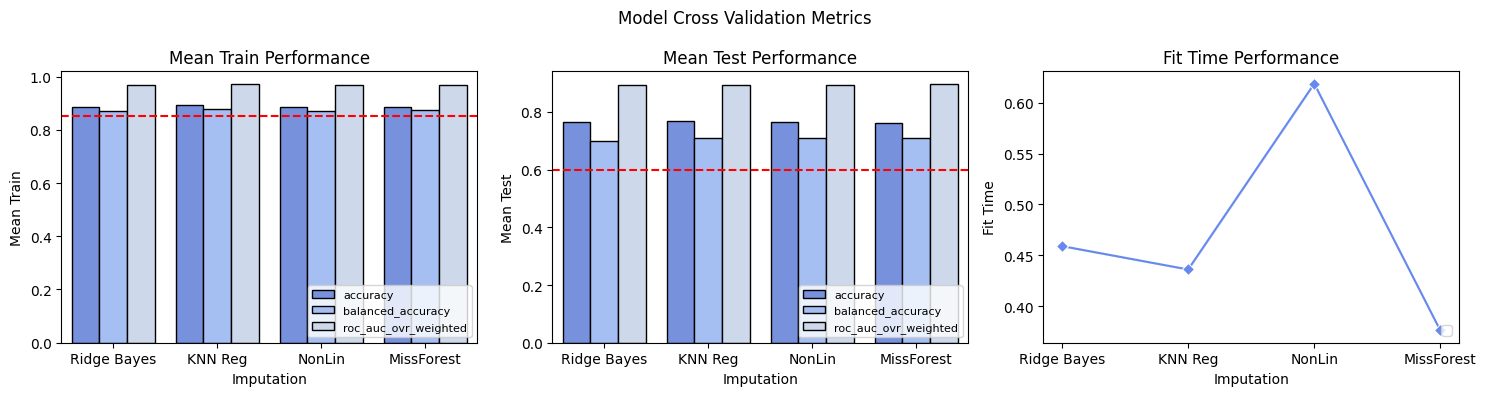

In [23]:
# Filter the metrics you want to plot (Fit Time, Accuracy, Balanced Accuracy, ROC AUC)
metrics_to_plot = ['accuracy', 'balanced_accuracy', 'roc_auc_ovr_weighted']
filtered_df_validation = validation_df[validation_df['Metric'].isin(metrics_to_plot)]
filtered_df_validation

sns.set_palette("coolwarm")
fig, axs = plt.subplots(1,3, figsize = (15, 4))

plt.suptitle("Model Cross Validation Metrics")
sns.barplot(data=filtered_df_validation, x='Imputation', y='Mean Train', hue='Metric', edgecolor='black', ax = axs[0])
axs[0].legend(loc="lower right",  fontsize=8)
axs[0].axhline(y=0.85, color='red', linestyle='--', linewidth=1.5) 
axs[0].set_title("Mean Train Performance")

sns.barplot(data=filtered_df_validation, x='Imputation', y='Mean Test', hue='Metric', edgecolor='black', ax = axs[1])
axs[1].legend(loc="lower right",  fontsize=8)
axs[1].axhline(y=0.60, color="red", linestyle="--", linewidth=1.5)
axs[1].set_title("Mean Test Performance")

sns.lineplot(data=filtered_df_validation, x='Imputation', y=filtered_df_validation['Fit Time'], marker="D", ax = axs[2])
axs[2].legend(loc="lower right")
axs[2].set_title("Fit Time Performance")

plt.tight_layout()

### Evaluate

In [24]:
from sklearn.utils import resample

def bootstrap_ci(model, X, y, metric_fn, n_iterations, ci=0.95, use_proba=False):
    scores = []
    n = len(X)
    for _ in range(n_iterations):
        X_resampled, y_resampled = resample(X, y, n_samples=n, stratify=y)
        try:
            y_pred = model.predict_proba(X_resampled) if use_proba else model.predict(X_resampled)
            score = metric_fn(y_resampled, y_pred)
            if not np.isnan(score):
                scores.append(score)
        except Exception:
            # Skip this bootstrap sample if error occurs (e.g. missing class for roc_auc)
            continue
    if len(scores) == 0:
        return (np.nan, np.nan)
    lower = np.percentile(scores, (1 - ci) / 2 * 100)
    upper = np.percentile(scores, (1 + ci) / 2 * 100)
    std_dev = np.std(scores)
    return round(lower, 3), round(upper, 3), round(std_dev, 3)

In [25]:
from sklearn.metrics import confusion_matrix

def compute_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    total = cm.sum()
    tp = np.diag(cm)
    fp = cm.sum(axis=0) - tp
    fn = cm.sum(axis=1) - tp
    tn = total - (tp + fp + fn)
    specificity = tn / (tn + fp)
    return round(np.nanmean(specificity), 3)

In [26]:
import time

def eval_random_forest(classifier_name, imp_method, model, X_train, X_test, y_train, y_test):
        
        start_time = time.time()
        # Get predicted probabilities for ROC AUC
        pred_train_proba = model.predict_proba(X_train)
        pred_test_proba = model.predict_proba(X_test)
        
        # Get predicted accuracy values
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        
        metrics_train = {
                "accuracy": accuracy_score(y_train, pred_train),
                "balanced_accuracy": balanced_accuracy_score(y_train, pred_train),
                "precision_macro": precision_score(y_train, pred_train, average="macro", zero_division=0),
                "recall_macro": recall_score(y_train, pred_train, average="macro", zero_division=0),
                "f1_macro": f1_score(y_train, pred_train, average="macro", zero_division=0),
                "roc_auc_macro": roc_auc_score(y_train, pred_train_proba, average="macro", multi_class="ovr"),
                "specificity_macro": compute_specificity(y_train, pred_train),
        }

        metrics_test = {
                "accuracy": accuracy_score(y_test, pred_test),
                "balanced_accuracy": balanced_accuracy_score(y_test, pred_test),
                "precision_macro": precision_score(y_test, pred_test, average="macro", zero_division=0),
                "recall_macro": recall_score(y_test, pred_test, average="macro", zero_division=0),
                "f1_macro": f1_score(y_test, pred_test, average="macro", zero_division=0),
                "roc_auc_macro": roc_auc_score(y_test, pred_test_proba, average="macro", multi_class="ovr"),
                "specificity_macro": compute_specificity(y_test, pred_test),
        }
                
        elapsed_time = time.time() - start_time

        # Bootstrap functions
        metric_fns = {
                "accuracy": accuracy_score,
                "balanced_accuracy": balanced_accuracy_score,
                "precision_macro": lambda yt, yp: precision_score(yt, yp, average="macro", zero_division=0),
                "recall_macro": lambda yt, yp: recall_score(yt, yp, average="macro", zero_division=0),
                "f1_macro": lambda yt, yp: f1_score(yt, yp, average="macro", zero_division=0),
                "roc_auc_macro": lambda yt, yp: roc_auc_score(yt, yp, average="macro", multi_class="ovr"),
                "specificity_macro": lambda yt, yp: compute_specificity(yt, yp),
        }

        # Bootstrap confidence intervals
        ci_test = {
                m: bootstrap_ci(
                model, X_test, y_test, fn,
                n_iterations=100,
                use_proba=(m == "roc_auc_macro")
                )
                for m, fn in metric_fns.items()
        }

        # Separate CI bounds and std with clear variable names
        ci_bounds = []
        std_values = []
                
        for lower, upper, std in ci_test.values():
                ci_bounds.append(f"[{round(lower, 3)}, {round(upper, 3)}]")
                std_values.append(round(std, 3)) 
                
        # Round metric values
        train_rounded = [round(score, 3) for score in metrics_train.values()]
        test_rounded = [round(score, 3) for score in metrics_test.values()] 

        
        # Create the DataFrame without additional rounding
        pred_metrics_df = pd.DataFrame({
                "Classifier": classifier_name,
                "Imputation": imp_method,
                "Classification Time": round(elapsed_time, 3),
                "Metric": metrics_train.keys(),
                "Train data": train_rounded,
                "Test data": test_rounded,
                "95% CI": ci_bounds,
                "Std Dev": std_values,
    })
        
        return pred_metrics_df

In [27]:
pred_bayes = eval_random_forest("Random Forest", "Ridge Bayes", bayes_model, X_train_bayes_t, X_test_bayes_t, y_train, y_test)
pred_knn = eval_random_forest("Random Forest", "KNN Reg", knn_model, X_train_knn_t, X_test_knn_t, y_train, y_test)
pred_nonLin = eval_random_forest("Random Forest", "NonLin", nonLin_model, X_train_nonLin_t, X_test_nonLin_t, y_train, y_test)
pred_missForest = eval_random_forest("Random Forest", "MissForest", missForest_model, X_train_missForest_t, X_test_missForest_t, y_train, y_test)

In [28]:
prediction_df = pd.concat([pred_bayes, pred_knn, pred_nonLin, pred_missForest])
prediction_df_report = prediction_df.set_index(["Classifier", "Imputation",	"Classification Time", "Metric"])
prediction_df_report

Train data  \
Classifier    Imputation  Classification Time Metric                          
Random Forest Ridge Bayes 0.115               accuracy                0.882   
                                              balanced_accuracy       0.873   
                                              precision_macro         0.851   
                                              recall_macro            0.873   
                                              f1_macro                0.861   
                                              roc_auc_macro           0.969   
                                              specificity_macro       0.938   
              KNN Reg     0.086               accuracy                0.874   
                                              balanced_accuracy       0.862   
                                              precision_macro         0.843   
                                              recall_macro            0.862   
                                              f1_macro                0.851   
                                              roc_auc_macro           0.969   
                                              specificity_macro       0.933   
              NonLin      0.085               accuracy                0.877   
                                              balanced_accuracy       0.871   
                                              precision_macro         0.846   
                                              recall_macro            0.871   
                                              f1_macro                0.857   
                                              roc_auc_macro           0.969   
                                              specificity_macro       0.936   
              MissForest  0.089               accuracy                0.879   
                                              balanced_accuracy       0.872   
                                              precision_macro         0.849   
                                              recall_macro            0.872   
                                              f1_macro                0.859   
                                              roc_auc_macro           0.969   
                                              specificity_macro       0.936   

                                                                 Test data  \
Classifier    Imputation  Classification Time Metric                         
Random Forest Ridge Bayes 0.115               accuracy               0.728   
                                              balanced_accuracy      0.711   
                                              precision_macro        0.685   
                                              recall_macro           0.711   
                                              f1_macro               0.693   
                                              roc_auc_macro          0.867   
                                              specificity_macro      0.851   
              KNN Reg     0.086               accuracy               0.709   
                                              balanced_accuracy      0.694   
                                              precision_macro        0.662   
                                              recall_macro           0.694   
                                              f1_macro               0.671   
                                              roc_auc_macro          0.866   
                                              specificity_macro      0.843   
              NonLin      0.085               accuracy               0.722   
                                              balanced_accuracy      0.704   
                                              precision_macro        0.677   
                                              recall_macro           0.704   
                                              f1_macro               0.684   
                                              roc_auc_ma

C:\Users\steve\AppData\Local\Temp\ipykernel_17036\169164776.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend(loc="lower right")


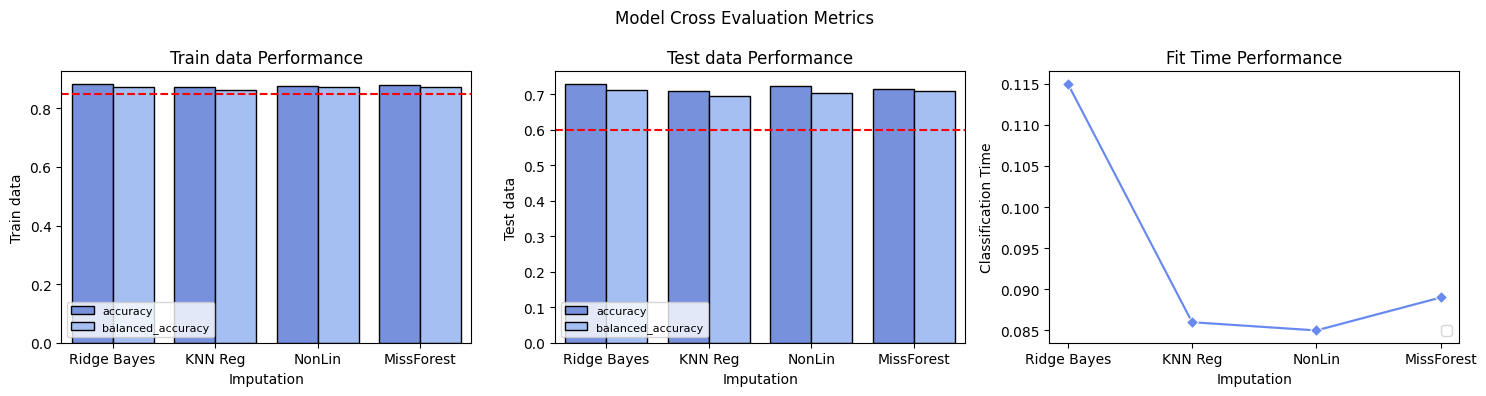

In [29]:
# Filter the metrics you want to plot (Fit Time, Accuracy, Balanced Accuracy, ROC AUC)
metrics_to_plot = ['accuracy', 'balanced_accuracy', 'roc_auc_ovr_weighted']
filtered_df_evaluation = prediction_df[prediction_df['Metric'].isin(metrics_to_plot)]
filtered_df_evaluation

sns.set_palette("coolwarm")
fig, axs = plt.subplots(1,3, figsize = (15, 4))

plt.suptitle("Model Cross Evaluation Metrics")
sns.barplot(data=filtered_df_evaluation, x='Imputation', y='Train data', hue='Metric', edgecolor='black', ax = axs[0])
axs[0].legend(loc="lower left",  fontsize=8)
axs[0].axhline(y=0.85, color='red', linestyle='--', linewidth=1.5) 
axs[0].set_title("Train data Performance")

sns.barplot(data=filtered_df_evaluation, x='Imputation', y='Test data', hue='Metric', edgecolor='black', ax = axs[1])
axs[1].legend(loc="lower left",  fontsize=8)
axs[1].axhline(y=0.60, color="red", linestyle="--", linewidth=1.5)
axs[1].set_title("Test data Performance")

sns.lineplot(data=filtered_df_evaluation, x='Imputation', y=filtered_df_evaluation['Classification Time'], marker="D", ax = axs[2])
axs[2].legend(loc="lower right")
axs[2].set_title("Fit Time Performance")

plt.tight_layout()